<a href="https://colab.research.google.com/github/MelikaTajipour/ME592_Spring2023/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
! mkdir ~/.kaggle

In [7]:
cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:15<00:00, 104MB/s] 
100% 2.29G/2.29G [00:15<00:00, 159MB/s]


In [10]:
!unzip -q /content/chest-xray-pneumonia.zip 

In [11]:
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [12]:
import numpy as np
import pandas as pd 
import imageio

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import scipy.ndimage as ndi

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization, ReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image
from keras.utils import plot_model

In [22]:
dirname = '/content/chest_xray'
train_nrml_pth = os.path.join(dirname, 'train', 'NORMAL')
train_pnm_pth = os.path.join(dirname, 'train', 'PNEUMONIA')
test_nrml_pth = os.path.join(dirname, 'test', 'NORMAL')
test_pnm_pth = os.path.join(dirname, 'test', 'PNEUMONIA')
val_nrml_pth = os.path.join(dirname, 'val', 'NORMAL')
val_pnm_pth = os.path.join(dirname, 'val', 'PNEUMONIA')


In [23]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img)

    plt.tight_layout()

In [24]:
train_nrml_pth = os.path.join('/content/chest_xray/train/NORMAL')
train_pneumonia_pth = os.path.join('/content/chest_xray/train/PNEUMONIA')

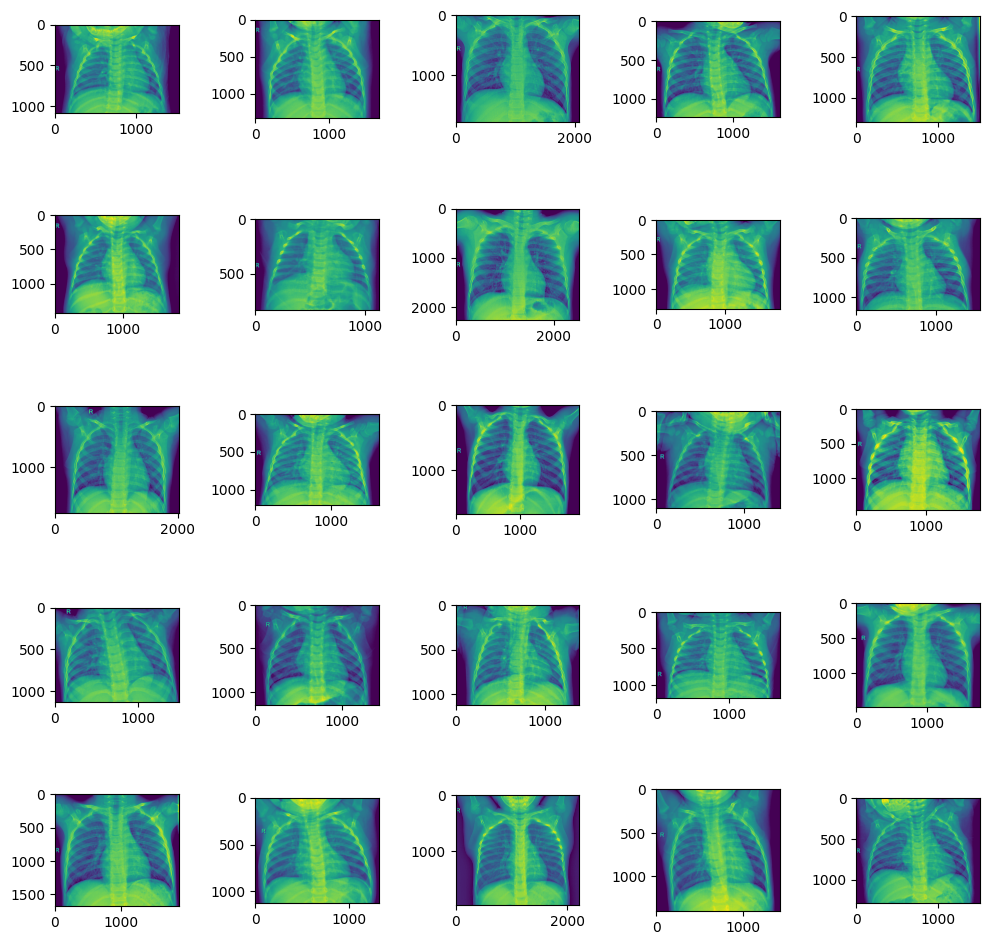

In [25]:
plot_imgs(train_nrml_pth)

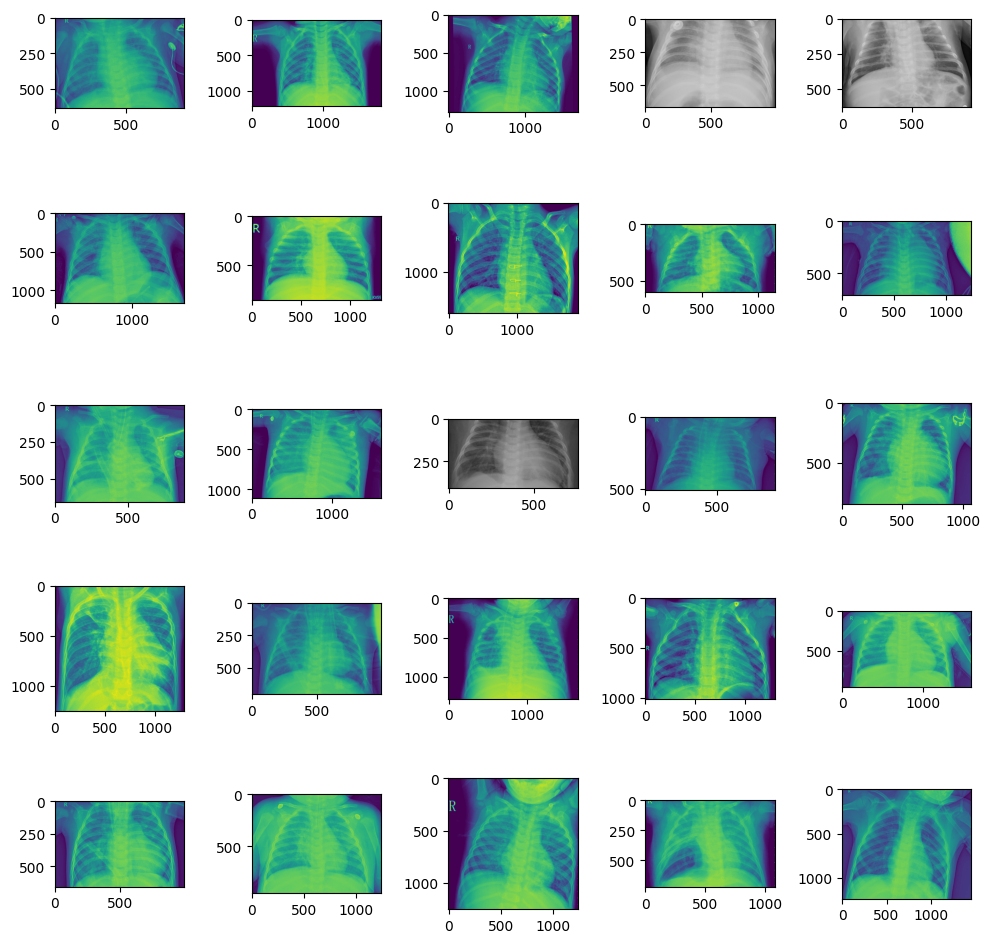

In [26]:
plot_imgs(train_pnm_pth)

In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_img_hist(item_dir, num_img=6):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
  
    for idx, img_path in enumerate(item_files):
        fig1 = plt.figure(idx,figsize=(10, 10))
        fig1.add_subplot(2, 2, 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        fig1.add_subplot(2, 2, 2)
        plt.hist(img.ravel(),bins=256, fc='k', ec='k')
  
    plt.tight_layout()


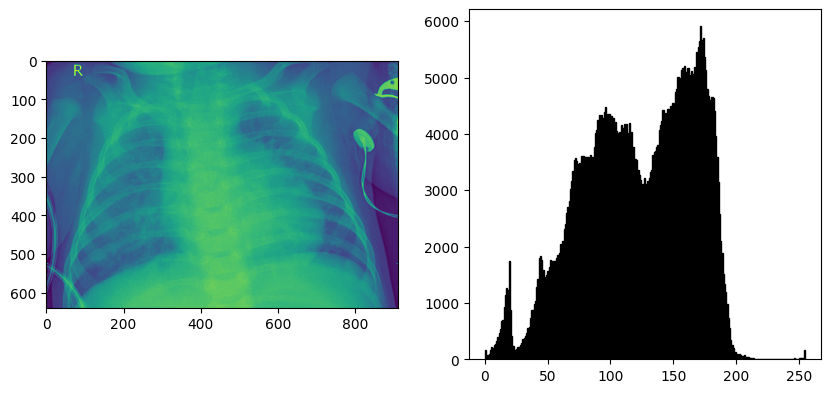

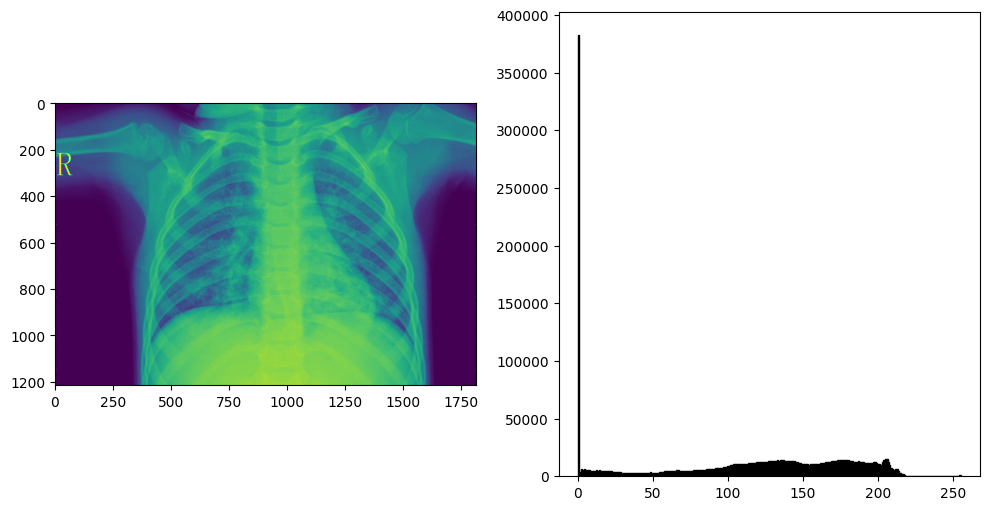

In [29]:
plot_img_hist(train_pnm_pth,2)